### WeRateDogs Twitter Data Wrangling

### Introduction

This project will involve gathering, assessing, cleaning and analysising the weratedogs twitter page. The main objective will be to effectiviely data wrangling the data, then explore trends in the rating system and the popularity on twitter.

## Gather 

The aim of this section is to import all required libraries and data that will be used into seperate panda dataframes.

In [282]:
#Import all libraries needed
import pandas as pd
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import random
% matplotlib inline

In [283]:
#Load and import all data into dataframes
twitter_df = pd.read_csv("twitter-archive-enhanced.csv")
#Check to see df working
twitter_df.shape

(2356, 17)

In [284]:
image_df = pd.read_csv("image-predictions.tsv", sep="\t")
#Check to see df working
image_df.shape

(2075, 12)

In [285]:
twitter_json_df = pd.read_json("tweet-json.txt", lines=True)
#Check json file
twitter_json_df.shape

(2354, 31)

In [286]:
#Copy and pasted API section to access data, I left comments as they are

twitter_json_df.head(1)



,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


# Assess and clean


During this section I will assess the data and document it for later when I clean it. I will clean each dataset after I clean it to prevent a big "to clean" list piling up and unnecessary scrolling. Then at the end, I will assess the datasets again together to be cleaned again as they might need to be merged in to fewer datasets. 
I will start with some quick visual assessments of each datasets within juypter, then move to programmatic assessments. I will follow a similar pattern for each dataset so it is easier to follow, as well as keeping the data quality dimensions in mind: Completeness, validity, accuracy and consistency.


## To be cleaned:
## Quality- Twitter table
- Convert timestamp to date format so it's easier to use during analysis
- Delete row that are retweets or replies 
- Drop reply and retweet columns once those rows have been deleted
- Drop type dogs once merged into one column

## Tidiness- Twitter table
- Columns for dogtionary type made in to one "type" column
- Dog ratings made into one column as all denominators are rated the same




In [287]:
#Assessing twitter_df 
twitter_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [288]:
#Checking all denominators are 10
#Denominators won't need to be changed as column can just be dropped
twitter_df["rating_denominator"].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [289]:
#Checking all numerators
#They are all different but will be kept as it is part of the popular ratings
twitter_df["rating_numerator"].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [290]:
#Checking data types and what columns have missing data
#Timestamp is a string and could be more useful in datetime format
#Missing urls
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [291]:
#Showing shape of missing values 
twitter_df[twitter_df["expanded_urls"].isnull()].shape


(59, 17)

In [292]:
#Checking for duplicates
sum(twitter_df.duplicated())

0

In [293]:
#Double check there isn't any duplicated tweet id
twitter_df[twitter_df.tweet_id.duplicated()]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [294]:
#Checking if replies
sum(twitter_df["in_reply_to_status_id"].isnull())

#Replies show as an int otherwise it is Null, so rest are replies
    



2278

In [295]:
#Clean the first points for first dataset
#Make copy before cleaning
twitter_df_clean = twitter_df.copy()

In [296]:
#Drop denominator column using .drop()
twitter_df_clean.drop(columns="rating_denominator",inplace=True)
#Make sure it dropped
twitter_df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None


In [297]:
#Convert timestamp into datetime
sum(twitter_df["doggo"].isnull())

0

In [298]:
#Make dogtionary column and merge doggo, floofer, pupper and puppo
#Need to get rid of None and Null values



#Deleting None from columns so I can join them into the new column
twitter_df_clean.replace("None","",inplace=True)
twitter_df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,Phineas,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,Tilly,,,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,Archie,,,,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,Darla,,,,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,Franklin,,,,
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,,,,,
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,Jax,,,,
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,,,,,
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,Zoey,,,,
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,Cassie,doggo,,,


In [299]:
#Making new column
twitter_df_clean["dogtionary"] = twitter_df_clean["doggo"] + twitter_df_clean["floofer"] + twitter_df_clean["pupper"] + twitter_df_clean["puppo"]

In [300]:
#Testing new column
twitter_df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,name,doggo,floofer,pupper,puppo,dogtionary
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,Phineas,,,,,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,Tilly,,,,,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,Archie,,,,,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,Darla,,,,,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,Franklin,,,,,
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,,,,,,
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,Jax,,,,,
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,,,,,,
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,Zoey,,,,,
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,Cassie,doggo,,,,doggo


In [301]:
#Dropping other columns and testing
twitter_df_clean.drop(columns=["doggo","floofer","pupper","puppo"],inplace=True)
twitter_df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,name,dogtionary
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,Phineas,
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,Tilly,
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,Archie,
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,Darla,
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,Franklin,


In [302]:
#Filling empty spaces back in with None and testing
twitter_df_clean["dogtionary"].replace("","None",inplace=True)
twitter_df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,name,dogtionary
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,Jax,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,Zoey,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,Cassie,doggo


In [303]:
#Convert object to datetime format and check date type
twitter_df_clean["timestamp"] = pd.to_datetime(twitter_df_clean["timestamp"])
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
name                          2356 non-null object
dogtionary                    2356 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 239.4+ KB


In [304]:
#Find replies and retweets, delete then drop columns
twitter_df_clean = twitter_df_clean[twitter_df_clean["in_reply_to_status_id"].isnull() ==True]
#Checking rows have been removed before removing columns
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                      2278 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2278 non-null datetime64[ns]
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
name                          2278 non-null object
dogtionary                    2278 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 249.2+ KB


In [305]:
twitter_df_clean.drop(columns=["in_reply_to_status_id","in_reply_to_user_id"],inplace=True)
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                      2278 non-null int64
timestamp                     2278 non-null datetime64[ns]
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
name                          2278 non-null object
dogtionary                    2278 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 213.6+ KB


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [306]:
#Find  retweets, delete then drop columns
twitter_df_clean = twitter_df_clean[twitter_df_clean["retweeted_status_id"].isnull() ==True]
#Checking rows have been removed before removing columns
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                      2097 non-null int64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
name                          2097 non-null object
dogtionary                    2097 non-null object
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 196.6+ KB


In [307]:
twitter_df_clean.drop(columns=["retweeted_status_id","retweeted_status_user_id","retweeted_status_timestamp"],inplace=True)
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id            2097 non-null int64
timestamp           2097 non-null datetime64[ns]
source              2097 non-null object
text                2097 non-null object
expanded_urls       2094 non-null object
rating_numerator    2097 non-null int64
name                2097 non-null object
dogtionary          2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 147.4+ KB


## Assessing and Cleaning image_df

- Change column labels to clearer names
- Capatalise predictions and remove underscore 

In [308]:
#Checking column names
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [309]:
#Checking missing data
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [310]:
#Check any null values
image_df.isnull().mean()

tweet_id    0.0
jpg_url     0.0
img_num     0.0
p1          0.0
p1_conf     0.0
p1_dog      0.0
p2          0.0
p2_conf     0.0
p2_dog      0.0
p3          0.0
p3_conf     0.0
p3_dog      0.0
dtype: float64

In [311]:
#Check for duplicates
sum(image_df.duplicated())

0

In [312]:
#Cleaning

#Make new clean df
image_df_clean = image_df.copy()

In [313]:

#Using df.rename() 

image_df_clean.rename(columns={"p1":"prediction_1",
                               "p1_conf":"p1_confidence",
                              "p2":"prediction_2",
                               "p2_conf":"P2 Confidence",
                               "p3":"prediction_3",
                               "p3_conf":"p3_confidence",
                               
                              
                              }, inplace=True)


#Check labels
image_df_clean.head()

,tweet_id,jpg_url,img_num,prediction_1,p1_confidence,p1_dog,prediction_2,P2 Confidence,p2_dog,prediction_3,p3_confidence,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [314]:
#Replacing underscores with spaces
image_df_clean["prediction_1"] = image_df_clean["prediction_1"].replace("_"," ",regex=True)
image_df_clean
#Testing before doing other columns    


,tweet_id,jpg_url,img_num,prediction_1,p1_confidence,p1_dog,prediction_2,P2 Confidence,p2_dog,prediction_3,p3_confidence,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese mountain dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [315]:
image_df_clean["prediction_2"] = image_df_clean["prediction_2"].replace("_"," ",regex=True)
image_df_clean["prediction_3"] = image_df_clean["prediction_3"].replace("_"," ",regex=True)
image_df_clean
#Testing other columns

,tweet_id,jpg_url,img_num,prediction_1,p1_confidence,p1_dog,prediction_2,P2 Confidence,p2_dog,prediction_3,p3_confidence,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese mountain dog,0.651137,True,English springer,0.263788,True,Greater Swiss Mountain dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box turtle,0.933012,False,mud turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan mastiff,0.058279,True,fur coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping cart,0.962465,False,shopping basket,0.014594,False,golden retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature poodle,0.201493,True,komondor,0.192305,True,soft-coated wheaten terrier,0.082086,True


In [316]:
#Making strings into capital letters then testing before other columns
#Was going to make a new function but doesn't make code more efficient 
    
image_df_clean["prediction_1"] =image_df_clean["prediction_1"].str.title()
image_df_clean
#Check function is working before using for others

,tweet_id,jpg_url,img_num,prediction_1,p1_confidence,p1_dog,prediction_2,P2 Confidence,p2_dog,prediction_3,p3_confidence,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese Mountain Dog,0.651137,True,English springer,0.263788,True,Greater Swiss Mountain dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box Turtle,0.933012,False,mud turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan mastiff,0.058279,True,fur coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping Cart,0.962465,False,shopping basket,0.014594,False,golden retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature Poodle,0.201493,True,komondor,0.192305,True,soft-coated wheaten terrier,0.082086,True


In [317]:
image_df_clean["prediction_2"] =image_df_clean["prediction_2"].str.title()
image_df_clean["prediction_3"] =image_df_clean["prediction_3"].str.title()
#Test
image_df_clean

,tweet_id,jpg_url,img_num,prediction_1,p1_confidence,p1_dog,prediction_2,P2 Confidence,p2_dog,prediction_3,p3_confidence,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese Mountain Dog,0.651137,True,English Springer,0.263788,True,Greater Swiss Mountain Dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box Turtle,0.933012,False,Mud Turtle,0.045885,False,Terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan Mastiff,0.058279,True,Fur Coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping Cart,0.962465,False,Shopping Basket,0.014594,False,Golden Retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature Poodle,0.201493,True,Komondor,0.192305,True,Soft-Coated Wheaten Terrier,0.082086,True


In [318]:
#Going to title first df as well, didn't notice that earlier
twitter_df_clean["dogtionary"] = twitter_df_clean["dogtionary"].str.title()
twitter_df_clean
    


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dogtionary
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,,None
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,Jax,None
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,,None
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,Zoey,None
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,Cassie,Doggo


## Assessing and Cleaning twitter_json
## Quality
- Missing data for replies and retweets, don't need these rows or columns
- Drop geo column
- Dop contributors column
- Drop coordinates column


## Tidiness
- Text range has two variables in one column

In [319]:
twitter_json_df.head(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [320]:
twitter_json_df.info()
#Checking replies to see how many rows to drop
#Checking to see types on favourites and retweet counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [321]:
#Looking into geo column
sum(twitter_json_df["geo"].isnull())

2354

In [322]:
#Checking types, especially created at to see it is the same datetime format
twitter_json_df.dtypes

contributors                            float64
coordinates                             float64
created_at                       datetime64[ns]
display_text_range                       object
entities                                 object
extended_entities                        object
favorite_count                            int64
favorited                                  bool
full_text                                object
geo                                     float64
id                                        int64
id_str                                    int64
in_reply_to_screen_name                  object
in_reply_to_status_id                   float64
in_reply_to_status_id_str               float64
in_reply_to_user_id                     float64
in_reply_to_user_id_str                 float64
is_quote_status                            bool
lang                                     object
place                                    object
possibly_sensitive                      

In [323]:
#Checking to make sure there isn't any minus values
twitter_json_df["favorite_count"].value_counts()

0        179
610        3
345        3
2918       3
1691       3
2176       3
2768       3
1339       3
2706       3
522        2
3134       2
1618       2
250        2
2250       2
2660       2
2262       2
2305       2
1111       2
784        2
4878       2
346        2
14685      2
780        2
6923       2
6515       2
2433       2
3603       2
13518      2
3593       2
1536       2
        ... 
4681       1
523        1
559        1
802        1
527        1
27154      1
6676       1
535        1
537        1
6682       1
8731       1
23074      1
21029      1
667        1
6696       1
2608       1
35400      1
21041      1
4659       1
10804      1
4099       1
68152      1
10812      1
573        1
6718       1
33345      1
814        1
23108      1
2630       1
8143       1
Name: favorite_count, Length: 2007, dtype: int64

In [324]:
#Checking to make sure there isn't any minus values
twitter_json_df["retweet_count"].value_counts()

1972     5
3652     5
83       5
146      4
61       4
748      4
2243     4
336      4
183      4
179      4
1207     4
265      4
115      4
71       4
1124     4
542      4
819      4
577      4
516      4
397      3
619      3
661      3
2511     3
261      3
431      3
482      3
403      3
557      3
572      3
576      3
        ..
2088     1
1271     1
2030     1
43       1
5365     1
4143     1
3316     1
1263     1
16439    1
2104     1
4125     1
27       1
4121     1
4119     1
4079     1
1285     1
10226    1
8183     1
2042     1
11524    1
6148     1
7        1
1281     1
2060     1
1825     1
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

In [325]:
#Cleaning JSON df
#Make copy dataframe
twitter_json_clean = twitter_json_df.copy()

In [326]:
#Drop columns- geo, contributors, coordinates
twitter_json_clean.drop(columns=["geo","contributors","coordinates"],inplace=True)
twitter_json_clean.head()
#Test- didn't work first but added inplace to code

,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,id,id_str,in_reply_to_screen_name,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,892420643555336192,None,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,892177421306343426,892177421306343424,None,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,891815181378084864,None,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,891689557279858688,891689557279858688,None,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,891327558926688256,891327558926688256,None,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [327]:
#Delete rows which are quoted through quoted_status_id
twitter_json_clean = twitter_json_clean[twitter_json_clean["quoted_status_id"].isnull() ==True]
#Check rows dropped before removing column
twitter_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2353
Data columns (total 28 columns):
created_at                       2325 non-null datetime64[ns]
display_text_range               2325 non-null object
entities                         2325 non-null object
extended_entities                2073 non-null object
favorite_count                   2325 non-null int64
favorited                        2325 non-null bool
full_text                        2325 non-null object
id                               2325 non-null int64
id_str                           2325 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  2325 non-null bool
lang                             2325 non-null object
place                            1

In [328]:
#Drop quoted columns
twitter_json_clean.drop(columns=["quoted_status","quoted_status_id","quoted_status_id_str"],inplace=True)
twitter_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2325 entries, 0 to 2353
Data columns (total 25 columns):
created_at                       2325 non-null datetime64[ns]
display_text_range               2325 non-null object
entities                         2325 non-null object
extended_entities                2073 non-null object
favorite_count                   2325 non-null int64
favorited                        2325 non-null bool
full_text                        2325 non-null object
id                               2325 non-null int64
id_str                           2325 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  2325 non-null bool
lang                             2325 non-null object
place                            1

In [329]:
#Remove rows and drop columns for replies
twitter_json_clean = twitter_json_clean[twitter_json_clean["in_reply_to_status_id"].isnull() ==True]
#Check rows dropped before removing column
twitter_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 0 to 2353
Data columns (total 25 columns):
created_at                       2247 non-null datetime64[ns]
display_text_range               2247 non-null object
entities                         2247 non-null object
extended_entities                2050 non-null object
favorite_count                   2247 non-null int64
favorited                        2247 non-null bool
full_text                        2247 non-null object
id                               2247 non-null int64
id_str                           2247 non-null int64
in_reply_to_screen_name          0 non-null object
in_reply_to_status_id            0 non-null float64
in_reply_to_status_id_str        0 non-null float64
in_reply_to_user_id              0 non-null float64
in_reply_to_user_id_str          0 non-null float64
is_quote_status                  2247 non-null bool
lang                             2247 non-null object
place                            1 non-

In [330]:
#Dropping reply columns and also place as only one value
twitter_json_clean.drop(columns=["in_reply_to_screen_name","in_reply_to_status_id","in_reply_to_status_id_str",
                                 "in_reply_to_user_id","in_reply_to_user_id_str"],inplace=True)
twitter_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 0 to 2353
Data columns (total 20 columns):
created_at                       2247 non-null datetime64[ns]
display_text_range               2247 non-null object
entities                         2247 non-null object
extended_entities                2050 non-null object
favorite_count                   2247 non-null int64
favorited                        2247 non-null bool
full_text                        2247 non-null object
id                               2247 non-null int64
id_str                           2247 non-null int64
is_quote_status                  2247 non-null bool
lang                             2247 non-null object
place                            1 non-null object
possibly_sensitive               2159 non-null float64
possibly_sensitive_appealable    2159 non-null float64
retweet_count                    2247 non-null int64
retweeted                        2247 non-null bool
retweeted_status                

In [331]:
#Dropping place & display_text_range
twitter_json_clean.drop(columns=["place","display_text_range"],inplace=True)
twitter_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 0 to 2353
Data columns (total 18 columns):
created_at                       2247 non-null datetime64[ns]
entities                         2247 non-null object
extended_entities                2050 non-null object
favorite_count                   2247 non-null int64
favorited                        2247 non-null bool
full_text                        2247 non-null object
id                               2247 non-null int64
id_str                           2247 non-null int64
is_quote_status                  2247 non-null bool
lang                             2247 non-null object
possibly_sensitive               2159 non-null float64
possibly_sensitive_appealable    2159 non-null float64
retweet_count                    2247 non-null int64
retweeted                        2247 non-null bool
retweeted_status                 178 non-null object
source                           2247 non-null object
truncated                     

In [332]:
#Visually checking over all df again
twitter_df_clean.head(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dogtionary
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None


In [333]:
image_df_clean.head(5)


,tweet_id,jpg_url,img_num,prediction_1,p1_confidence,p1_dog,prediction_2,P2 Confidence,p2_dog,prediction_3,p3_confidence,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [334]:
twitter_json_clean.head(5)
#Remove id str column

,created_at,entities,extended_entities,favorite_count,favorited,full_text,id,id_str,is_quote_status,lang,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,retweeted_status,source,truncated,user
0,2017-08-01 16:23:56,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,892420643555336192,False,en,0.0,0.0,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,2017-08-01 00:17:27,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,892177421306343426,892177421306343424,False,en,0.0,0.0,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,2017-07-31 00:18:03,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,891815181378084864,False,en,0.0,0.0,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,2017-07-30 15:58:51,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,891689557279858688,891689557279858688,False,en,0.0,0.0,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,2017-07-29 16:00:24,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,891327558926688256,891327558926688256,False,en,0.0,0.0,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [335]:
twitter_json_clean.drop(columns="id_str",inplace=True)
twitter_json_clean.head(1)

,created_at,entities,extended_entities,favorite_count,favorited,full_text,id,is_quote_status,lang,possibly_sensitive,possibly_sensitive_appealable,retweet_count,retweeted,retweeted_status,source,truncated,user
0,2017-08-01 16:23:56,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,False,en,0.0,0.0,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [336]:
#Goingto merge all dataframes for analysis
#Columns wanted from first df- tweet id, source, rating num, name
twitter_merge = twitter_df_clean[["tweet_id","source","text","rating_numerator","dogtionary"]]
twitter_merge.head(5)

,tweet_id,source,text,rating_numerator,dogtionary
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,None
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,None
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,None
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,None
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,None


In [337]:
#Before I merge second dataframe, will see how many predictions aren't dogs
image_df_clean.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [338]:
#Columns wanted from second- tweet_id, jpg_url, prediction_1, p1_confidence, p1_dog
twitter_merge_2 = image_df_clean[["tweet_id","jpg_url","prediction_1","p1_confidence"]]
twitter_merge_2.head()

,tweet_id,jpg_url,prediction_1,p1_confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature Pinscher,0.560311


In [339]:
#Columns wanted favourite_count, id, retweet_count
#Cleaning I missed below
twitter_json_clean.rename(columns={"id":"tweet_id"},inplace=True)
twitter_merge_3 = twitter_json_clean[["tweet_id","favorite_count","retweet_count"]]
twitter_merge_3.head(5)
#Cleaning that I missed, id column has to match other labels and change spelling to favourite

,tweet_id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [340]:
#Help for this merge was taking from stack overflow
# https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns

#Merging 3 dataframes
twitter_analysis = pd.merge(pd.merge(twitter_merge,twitter_merge_2,on="tweet_id"),twitter_merge_3,on="tweet_id")

In [341]:
#Analysis of final dataframe
twitter_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 10 columns):
tweet_id            1971 non-null int64
source              1971 non-null object
text                1971 non-null object
rating_numerator    1971 non-null int64
dogtionary          1971 non-null object
jpg_url             1971 non-null object
prediction_1        1971 non-null object
p1_confidence       1971 non-null float64
favorite_count      1971 non-null int64
retweet_count       1971 non-null int64
dtypes: float64(1), int64(4), object(5)
memory usage: 169.4+ KB


In [342]:
#Exploring if there is relation between the ratings given and the amount of likes/retweets
#First sorting top rated dogs in new variable
top_rated = twitter_analysis.sort_values("rating_numerator",ascending=False)[:100]
top_rated

,tweet_id,source,text,rating_numerator,dogtionary,jpg_url,prediction_1,p1_confidence,favorite_count,retweet_count
722,749981277374128128,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,1776,None,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,Bow Tie,0.533941,5569,2772
1696,670842764863651840,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,420,None,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,Microphone,0.096063,7989,4324
842,731156023742988288,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,204,None,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,Lakeside,0.501767,4196,1434
658,758467244762497024,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,165,None,https://pbs.twimg.com/ext_tw_video_thumb/75846...,Labrador Retriever,0.436377,5316,2539
1420,677716515794329600,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,144,None,https://pbs.twimg.com/media/CWe7kw9W4AE8UJh.jpg,Teddy,0.662908,3323,1104
1288,684222868335505415,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,121,None,https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg,Soft-Coated Wheaten Terrier,0.791182,4225,1563
939,713900603437621249,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,99,None,https://pbs.twimg.com/media/CehIzzZWQAEyHH5.jpg,Golden Retriever,0.371816,3062,829
1478,675853064436391936,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an entire platoon of puppers. Tot...,88,None,https://pbs.twimg.com/media/CWEcxqWVEAAHyGH.jpg,Labrador Retriever,0.868367,2927,1460
320,820690176645140481,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,84,None,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,West Highland White Terrier,0.872064,13518,3716
963,710658690886586372,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,80,None,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,Soft-Coated Wheaten Terrier,0.948617,2529,636


In [343]:
#Doing same for top retweeted dogs and top liked 
top_retweet = twitter_analysis.sort_values("retweet_count",ascending=False)[:100]
top_retweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 769 to 1021
Data columns (total 10 columns):
tweet_id            100 non-null int64
source              100 non-null object
text                100 non-null object
rating_numerator    100 non-null int64
dogtionary          100 non-null object
jpg_url             100 non-null object
prediction_1        100 non-null object
p1_confidence       100 non-null float64
favorite_count      100 non-null int64
retweet_count       100 non-null int64
dtypes: float64(1), int64(4), object(5)
memory usage: 8.6+ KB


In [344]:
top_favorite = twitter_analysis.sort_values("favorite_count",ascending=False)[:100]
top_favorite

,tweet_id,source,text,rating_numerator,dogtionary,jpg_url,prediction_1,p1_confidence,favorite_count,retweet_count
306,822872901745569793,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,13,Puppo,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland Terrier,0.196015,132810,48265
769,744234799360020481,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,13,Doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador Retriever,0.825333,131075,79515
58,879415818425184262,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,13,None,https://pbs.twimg.com/ext_tw_video_thumb/87941...,English Springer,0.383404,107956,45849
397,807106840509214720,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,13,None,https://pbs.twimg.com/ext_tw_video_thumb/80710...,Chihuahua,0.505370,107015,56625
108,866450705531457537,"<a href=""http://twitter.com/download/iphone"" r...",This is Jamesy. He gives a kiss to every other...,13,Pupper,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg,French Bulldog,0.905334,106827,32883
330,819004803107983360,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,14,Doggo,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg,Standard Poodle,0.351308,95450,42228
93,870374049280663552,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She really likes the planet. Wou...,13,None,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,Golden Retriever,0.841001,85011,27680
399,806629075125202948,"<a href=""http://twitter.com/download/iphone"" r...","""Good afternoon class today we're going to lea...",13,None,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,Arabian Camel,0.366248,75639,37911
134,859196978902773760,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,12,None,https://pbs.twimg.com/ext_tw_video_thumb/85919...,Angora,0.224218,75193,25661
804,739238157791694849,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo blowing bubbles. It's downright...,13,Doggo,https://pbs.twimg.com/ext_tw_video_thumb/73923...,Eskimo Dog,0.503372,75163,52360


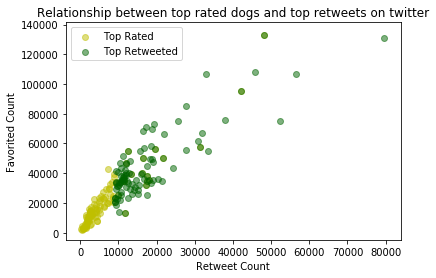

In [345]:
#Plotting a scatter to look at distribution of top rated dogs and popularity through retweets and favourites

plt.scatter(x=top_rated["retweet_count"],y=top_rated["favorite_count"],color="y",alpha=0.5);
plt.scatter(x=top_retweet["retweet_count"],y=top_retweet["favorite_count"],color="darkgreen",alpha=0.5);
plt.legend(["Top Rated","Top Retweeted"]);
plt.xlabel("Retweet Count");
plt.ylabel("Favorited Count");
plt.title("Relationship between top rated dogs and top retweets on twitter");


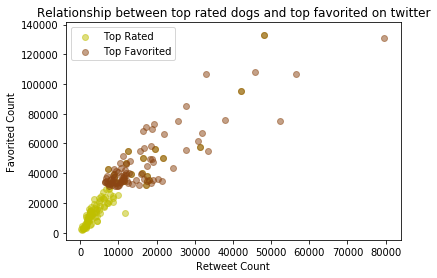

In [346]:
plt.scatter(x=top_rated["retweet_count"],y=top_rated["favorite_count"],color="y",alpha=0.5);
plt.scatter(x=top_favorite["retweet_count"],y=top_favorite["favorite_count"],color="saddlebrown",alpha=0.5);
plt.legend(["Top Rated","Top Favorited"]);
plt.xlabel("Retweet Count");
plt.ylabel("Favorited Count");
plt.title("Relationship between top rated dogs and top favorited on twitter");

In [347]:
#Checking to see how many are similar between retweets and faovrites as scatters look similar
test = top_favorite.merge(top_retweet)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78 entries, 0 to 77
Data columns (total 10 columns):
tweet_id            78 non-null int64
source              78 non-null object
text                78 non-null object
rating_numerator    78 non-null int64
dogtionary          78 non-null object
jpg_url             78 non-null object
prediction_1        78 non-null object
p1_confidence       78 non-null float64
favorite_count      78 non-null int64
retweet_count       78 non-null int64
dtypes: float64(1), int64(4), object(5)
memory usage: 6.7+ KB


In [348]:
#Looking into dogtionary categories and if they have an impact
top_favorite["dogtionary"].value_counts()

None           76
Doggo          10
Pupper          7
Puppo           4
Floofer         1
Doggopupper     1
Doggopuppo      1
Name: dogtionary, dtype: int64

In [349]:
top_retweet["dogtionary"].value_counts()

None           77
Doggo           9
Pupper          8
Puppo           3
Floofer         1
Doggopupper     1
Doggopuppo      1
Name: dogtionary, dtype: int64

In [350]:
top_rated["dogtionary"].value_counts()

None           75
Pupper         11
Doggo          10
Puppo           3
Doggopupper     1
Name: dogtionary, dtype: int64

Doesn't seem like there is enough data to make conclusions for dogtionary categories but from the data above it seems like this doesn't impact popularity on twitter or dog ratings. 

In [351]:
#Looking at top predictions for top ratedand popularities 
top_favorite["prediction_1"].value_counts()

Golden Retriever             12
Samoyed                       7
Labrador Retriever            6
Chihuahua                     5
Pembroke                      5
French Bulldog                4
Cardigan                      3
Web Site                      3
Home Theater                  2
Blenheim Spaniel              2
Toy Poodle                    2
Pug                           2
Pomeranian                    2
Upright                       1
Comic Book                    1
Swing                         1
Laptop                        1
Arabian Camel                 1
Giant Schnauzer               1
Bubble                        1
Paper Towel                   1
Italian Greyhound             1
Angora                        1
Black-And-Tan Coonhound       1
Basset                        1
Barbell                       1
Border Collie                 1
Gondola                       1
Chow                          1
German Shepherd               1
Prison                        1
Chesapea

In [352]:
top_rated["prediction_1"].value_counts()

Golden Retriever                  12
Pembroke                           6
Web Site                           5
Labrador Retriever                 4
Samoyed                            4
French Bulldog                     3
Borzoi                             2
Great Pyrenees                     2
Soft-Coated Wheaten Terrier        2
Border Terrier                     2
Cardigan                           2
West Highland White Terrier        2
Chihuahua                          2
Pomeranian                         2
American Staffordshire Terrier     2
Siberian Husky                     2
Eskimo Dog                         2
Prison                             2
Beagle                             1
Teapot                             1
Cocker Spaniel                     1
Microphone                         1
Military Uniform                   1
Bloodhound                         1
Home Theater                       1
Comic Book                         1
Boxer                              1
L

In [353]:
top_retweet["prediction_1"].value_counts()

Golden Retriever             12
Labrador Retriever            6
Pembroke                      5
Samoyed                       5
French Bulldog                3
Web Site                      3
Pomeranian                    3
Cardigan                      3
Great Pyrenees                3
Pug                           2
Toy Poodle                    2
Hippopotamus                  2
Cocker Spaniel                2
Basset                        2
Chihuahua                     2
Chesapeake Bay Retriever      1
Flat-Coated Retriever         1
Upright                       1
Swing                         1
Laptop                        1
Shih-Tzu                      1
Arabian Camel                 1
Eskimo Dog                    1
Giant Schnauzer               1
Chow                          1
Bubble                        1
Italian Greyhound             1
Brown Bear                    1
Conch                         1
Boxer                         1
Prison                        1
Barbell 

In [354]:
#Now going to looking into the 1st predictions for Golden Retrievers and Labrador Retrievers against confidence levels
prediction_retriever = twitter_analysis.query("prediction_1 == 'Golden Retriever' or prediction_1 == 'Labrador Retriever'")
prediction_retriever.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 14 to 1960
Data columns (total 10 columns):
tweet_id            231 non-null int64
source              231 non-null object
text                231 non-null object
rating_numerator    231 non-null int64
dogtionary          231 non-null object
jpg_url             231 non-null object
prediction_1        231 non-null object
p1_confidence       231 non-null float64
favorite_count      231 non-null int64
retweet_count       231 non-null int64
dtypes: float64(1), int64(4), object(5)
memory usage: 19.9+ KB


In [355]:
prediction_retriever.mean()

tweet_id            7.537431e+17
rating_numerator    1.295238e+01
p1_confidence       6.990171e-01
favorite_count      1.216574e+04
retweet_count       3.750364e+03
dtype: float64

In [356]:
#Index for confidence
retriever = prediction_retriever.mean()[2]
retriever

0.69901707792207801

In [357]:
prediction_no_retriever = twitter_analysis.query("prediction_1 != 'Golden Retriever' or prediction_1 != 'Labrador Retriever'")
prediction_no_retriever.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 10 columns):
tweet_id            1971 non-null int64
source              1971 non-null object
text                1971 non-null object
rating_numerator    1971 non-null int64
dogtionary          1971 non-null object
jpg_url             1971 non-null object
prediction_1        1971 non-null object
p1_confidence       1971 non-null float64
favorite_count      1971 non-null int64
retweet_count       1971 non-null int64
dtypes: float64(1), int64(4), object(5)
memory usage: 169.4+ KB


In [358]:
#Take an equal random sample from non-retriever df and calculate mean of confidence
prediction_non_retriever = prediction_no_retriever["p1_confidence"].sample(n=231).mean()
prediction_non_retriever

0.59999243896103882

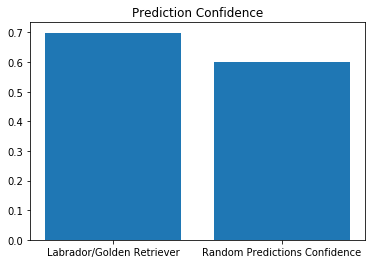

In [359]:
#Exploring visuals
data = [prediction_non_retriever,retriever]
plt.bar(["Random Predictions Confidence","Labrador/Golden Retriever"],data);
plt.title("Prediction Confidence");